# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Eddy Hu \
**Email:** bh2730@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

In [ ]:
#Todo
'''
## 1. Split strategy

Proposed strategy that ensures the generalizability of the model.

- Training - 80% speakers (1000 * 100 * 0.8 = 80000 recordings)
- Validation - 10% speakers (1000 * 100 * 0.1 = 10000 recordings)
- Test - 10% speakers (1000 * 100 * 0.1 = 10000 recordings)

Reasoning: 
By splitting the dataset at the speaker level, we ensure that the model is evaluated on entirely unseen speakers during validation and testing.
This ensuress that the model's performance reflects its ability to generalize to new speakers. 70% ensures enough data for training, 
while 15% each for validation and testing provides a robust evaluation framework.


## 2. Additional dataset of 10000 recordings from Killian

In order to personalize the model given the additional data, we can keep the general model trained on the orignal dataset with the fineturning strategy
above, and then finetune it on Killian's data.

Finetuning the model maintains generalization and will perform specifically well for Killian's voice.

We can apply another split strategy on Killian's dataset for fine tuning as follows:
- Training - 75% recordings (7500 recordings)
- Validation - 15% recordings (1500 recordings)
- Test - 10% recordings (1000 recordings)
 
'''

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


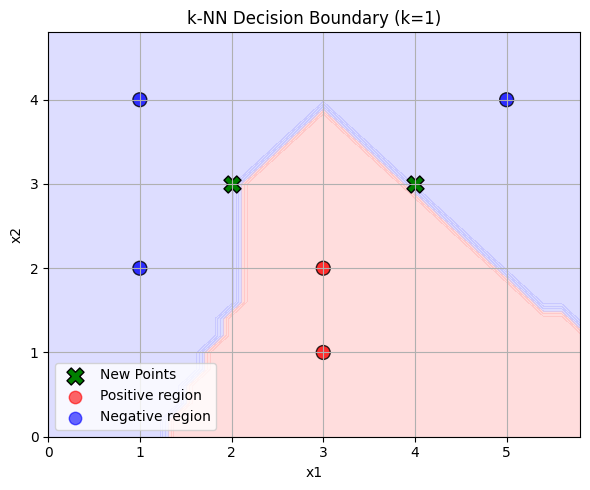

In [6]:
#Todo
# 1-NN Classification
from matplotlib.colors import ListedColormap

X_train = np.array([
    [1, 2],
    [1, 4],
    [5, 4],
    [3, 1],
    [3, 2],
])

y_train = np.array([1, 1, 1,   
                   0, 0])      

def plot_decision_boundary(k_value=1):

    h = 0.2
    x_min, x_max = 0, 6
    y_min, y_max = 0, 5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

    plt.scatter(X_train[:, 0], X_train[:, 1],
                c=y_train, cmap=cmap_bold,
                s=100, edgecolor='black', alpha=0.8)

    # New points
    new_points = np.array([[2, 3], [4, 3]])
    plt.scatter(new_points[:, 0], new_points[:, 1],
                c='green', marker='X',
                s=150, edgecolor='black', label='New Points')

    new_labels = knn.predict(new_points)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'k-NN Decision Boundary (k={k_value})')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


    plt.scatter([], [], c='red', s=80, label='Positive region', alpha=0.6)
    plt.scatter([], [], c='blue', s=80, label='Negative region', alpha=0.6)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_decision_boundary(k_value=1)


In [ ]:
#Todo
'''
## 2. Feature Scaling

1-NN classfiy point (500, 1)

Before scaling to [0, 1]/feature: Positive, as it is closest to (500, 4)

After scaling to [0, 1]/feature: 

Positive (0, 1/3), (0, 1), (1, 1)
Negative (0.5, 0), (0.5, 1/3)

(1, 0), closest to (0.5, 0)

# 3. Handling Missing Values

Missing values in distance calculation can be ignored by only considering the dimensions where both points have valid values.

## 4. High-dimensional Data

Because image, as data of higher dimensions, wouldn't affect the distance calculation in k-NN.
In other words, k-NN can deal with distance calculations in higher dimension dataset 
and would perform well as long as nearby points correspond to the same label.

'''

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [ ]:
#Todo

'''
1. Yes, as it is possible to count directly the number of missclassified points
in each set and thus determining higher erros.

2. Because after the training, the Perceptron would have achieved zero training error by construction.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [7]:
# Todo
'''
9 updates are required

Sequence
  w0 = (0, 0)
  w1 = (10, -2)
  w2 = (-2, -4)
  w3 = (8, -6)
  w4 = (-4, -8)
  w5 = (6, -10)
  w6 = (-6, -12)
  w7 = (4, -14)
  w8 = (-8, -16)
  w9 = (2, -18)
'''

'\n9 updates are required\n\nSequence\n  w1 = (10, -2)\n  w1 = (10, -2)\n  w1 = (10, -2)\n  w1 = (10, -2)\n  w1 = (10, -2)\n'

### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [ ]:
#Todo
# Final weight
#(-3, -10, 3, -3, 3)

### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

Epoch 1: 1 errors, w=[2.49671415 1.8617357 ], b=1.00
Epoch 2: 0 errors, w=[2.49671415 1.8617357 ], b=1.00


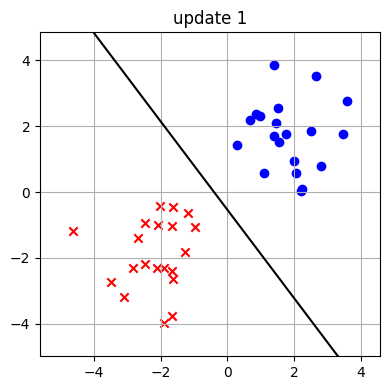

In [8]:
#Todo

# Implement a Perceptron on a small 2D dataset with positive and negative examples.
'''
- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.
'''

# Perceptron implementation
# y = mx + c -> y = wx + b
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self):
        self.w = None
        self.b = 0
        self.history = []
    
    def predict(self, x):
        return np.sign(np.dot(self.w, x) + self.b)
    
    def train_step(self, x, y):
        if self.w is None:
            self.w = np.zeros(len(x))
        prediction = self.predict(x)
        if prediction != y:
            self.w += y * x
            self.b += y
            self.history.append({'w': self.w.copy(), 'b': self.b})
            return False
        return True

np.random.seed(42)
X_pos = np.random.randn(20, 2) + np.array([2, 2])
y_pos = np.ones(20)
X_neg = np.random.randn(20, 2) + np.array([-2, -2])
y_neg = -np.ones(20)

X_perceptron = np.vstack([X_pos, X_neg])
y_perceptron = np.concatenate([y_pos, y_neg])

perceptron = Perceptron()

max_epochs = 10
for epoch in range(max_epochs):
    errors = 0
    for x, y in zip(X_perceptron, y_perceptron):
        correct = perceptron.train_step(x, y)
        if not correct:
            errors += 1
    print(f"Epoch {epoch + 1}: {errors} errors, w={perceptron.w}, b={perceptron.b:.2f}")
    if errors == 0:
        break

x_min, x_max = X_perceptron[:,0].min() - 1, X_perceptron[:,0].max() + 1
y_min, y_max = X_perceptron[:,1].min() - 1, X_perceptron[:,1].max() + 1

pos = X_perceptron[y_perceptron == 1]
neg = X_perceptron[y_perceptron == -1]

def plot_step(w, b, i):
    plt.figure(figsize=(4,4))
    plt.scatter(pos[:,0], pos[:,1], c='b', marker='o')
    plt.scatter(neg[:,0], neg[:,1], c='r', marker='x')
    xs = np.linspace(x_min, x_max, 100)
    if w[1] != 0:
        ys = -(w[0]*xs + b)/w[1]
        plt.plot(xs, ys, 'k-')
    else:
        plt.axvline(x=-b/w[0], color='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(f"update {i}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for i, h in enumerate(perceptron.history, start=1):
    plot_step(h['w'], h['b'], i)
